### Fetching the dataset

In [1]:
#Mounting the google drive so that the images can be added and accessed
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!pip install -qU openimages torch_snippets urllib3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.2/204.2 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 54.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 73.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 15.7 MB/s et

In [3]:
!pip install lovely-tensors

In [4]:
#Importing the packages to fetch the JSON file contains about the image informations to download
!wget -O open_images_train_captions.jsonl -q https://storage.googleapis.com/localized-narratives/annotations/open_images_train_v6_captions.jsonl

In [5]:
# Import the relevant packages and defining the device
from torch_snippets import *
import json
device = 'cuda' if torch.cuda.is_available() else 'cpu'

print("Running on device: ", device)

Running on device:  cuda

In [6]:
#Loop through the content of the JSON file and fetch the information of the first 100,000 images
import json
import pandas as pd
import numpy as np
from tqdm import tqdm

#Opening the JSON file
with open('open_images_train_captions.jsonl','r') as json_file:

    # Reading the file and split it into a list of JSON strings
    json_list = json_file.read().split("\n")


np.random.shuffle(json_list)
data = []
N = 10000

# Iteraing over the JSON strings
for ix, json_str in tqdm(enumerate(json_list), total=N):
    if ix == N:
        break
    try:
        result = json.loads(json_str)
        x = pd.DataFrame.from_dict(result, orient="index").T
        data.append(x)
    except:
        pass

100%|██████████| 10000/10000 [00:04<00:00, 2409.41it/s]


In [7]:
x

,dataset_id,image_id,annotator_id,caption
0,open_images,3dbfd7dd00848687,107,"In this image, we can see two persons standing..."


In [8]:
result

{'dataset_id': 'open_images',
 'image_id': '3dbfd7dd00848687',
 'annotator_id': 107,
 'caption': 'In this image, we can see two persons standing, there is a barrel on the left side. We can see an orange color object on the barrel, at the top we can see the shed. We can see the wall and there is a painting on the wall.'}

In [9]:
# Split the dataframe (data) into training and validation datasets
np.random.seed(10)

data = pd.concat(data)
data['train'] = np.random.choice([True,False], size=len(data),p=[0.95,0.05])
data.to_csv('data.csv', index=False)

In [10]:
#Creating the directories train-images and val-images
!mkdir -p train-images val-images

In [11]:
# Downloading images for training set and saving them in the directory
from openimages.download import _download_images_by_id

subset_imageIds = data[data['train']].image_id.tolist()
_download_images_by_id(subset_imageIds, 'train', './train-images/')

subset_imageIds = data[~data['train']].image_id.tolist()
_download_images_by_id(subset_imageIds, 'train', './val-images/')

100%|██████████| 470/470 [00:11<00:00, 40.17it/s]


In [12]:
!pip install torchtext

In [13]:
!pip install --upgrade torchtext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 954.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 62.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 45.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 44.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 49.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━

In [14]:
pip install torchtext==0.6.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 1.1 MB/s eta 0:00:00
  Attempting uninstall: torchtext
    Found existing installation: torchtext 0.17.1
    Uninstalling torchtext-0.17.1:
      Successfully uninstalled torchtext-0.17.1


In [15]:
!pip install pydot

###Create a vocabulary of all the unique words present in all the captions in the dataframe:

In [16]:

# A vocabulary object is something that can map every word in all the captions to a unique integer and vice versa
from torchtext.data import Field
from pycocotools.coco import COCO
from collections import defaultdict

captions = Field(sequential=False, init_token='<start>', eos_token='<end>')

all_captions = data[data['train']]['caption'].tolist()
all_tokens = [[w.lower() for w in c.split()] for c in all_captions]
all_tokens = [w for sublist in all_tokens for w in sublist]

captions.build_vocab(all_tokens)

In [17]:
# Captioning the vocabulary components
class Vocab: pass

vocab = Vocab()
captions.vocab.itos.insert(0, '<pad>')
vocab.itos = captions.vocab.itos

vocab.stoi = defaultdict(lambda:captions.vocab.itos.index('<unk>'))
vocab.stoi['<pad>'] = 0

for s,i in captions.vocab.stoi.items():
    vocab.stoi[s] = i+1

In [18]:
print(data)

dataset_id          image_id annotator_id  \
0   open_images  f8e2823ad8e6ead9           29   
0   open_images  f399fa6599448a6a           14   
0   open_images  50b28bf6cf82279d           36   
0   open_images  e1630c27c34a65ed            2   
0   open_images  8b9ea89e94514d13           81   
..          ...               ...          ...   
0   open_images  d9c1c13c3a6adef4            2   
0   open_images  46ba1ead4c70305c           54   
0   open_images  4ffd46681070b638           79   
0   open_images  d1cd5558e4d5d2a0           85   
0   open_images  3dbfd7dd00848687          107   

                                              caption  train  
0   In this picture i could see two persons standi...   True  
0   In this image there is a man holding mobile in...   True  
0   This 3 persons are standing in-front of a frid...   True  
0   In the picture there are two men, they are hol...   True  
0   In this image, we can see people walking on th...   True  
..                                                ...    ...  
0   In the picture there is a monument and around ...   True  
0   In this image we can see one bird on the tree,...   True  
0   In this image I can see the group of people si...   True  
0   In this image I can see number of vehicles on ...   True  
0   In this image, we can see two persons standing...   True  

[10000 rows x 5 columns]

###Defining dataset class and its methods

In [19]:
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader

class CaptioningData(Dataset):
    def __init__(self, root, df, vocab):
        self.df = df.reset_index(drop=True)
        self.root = root
        self.vocab = vocab

        self.transform = transforms.Compose([
            transforms.Resize(224),
            transforms.RandomCrop(224),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))]
        )

    # Returns single data pair (image and caption)
    def __getitem__(self, index):
        row = self.df.iloc[index].squeeze()
        id = row.image_id

        image_path = f'{self.root}/{id}.jpg'
        image = Image.open(os.path.join(image_path)).convert('RGB')

        caption = row.caption

        tokens = str(caption).lower().split()
        target = []
        target.append(vocab.stoi['<start>'])
        target.extend([vocab.stoi[token] for token in tokens])
        target.append(vocab.stoi['<end>'])
        target = torch.Tensor(target).long()

        return image, target, caption

    def choose(self):
        return self[np.random.randint(len(self))]

    def __len__(self):
        return len(self.df)

    # Creates batch of captions and padds captions to be equal length
    def collate_fn(self, data):
        data.sort(key=lambda x: len(x[1]), reverse=True)
        images, targets, captions = zip(*data)
        images = torch.stack([self.transform(image) for image in images], 0)

        lengths = [len(tar) for tar in targets]
        _targets = torch.zeros(len(captions), max(lengths)).long()

        for i, tar in enumerate(targets):
            end = lengths[i]
            _targets[i, :end] = tar[:end]

        return images.to(device), _targets.to(device), torch.tensor(lengths).long().to(device)

###Define the training and validation dataset and data loaders


In [20]:
trn_ds = CaptioningData('train-images', data[data['train']], vocab)

val_ds = CaptioningData('val-images', data[~data['train']],vocab)

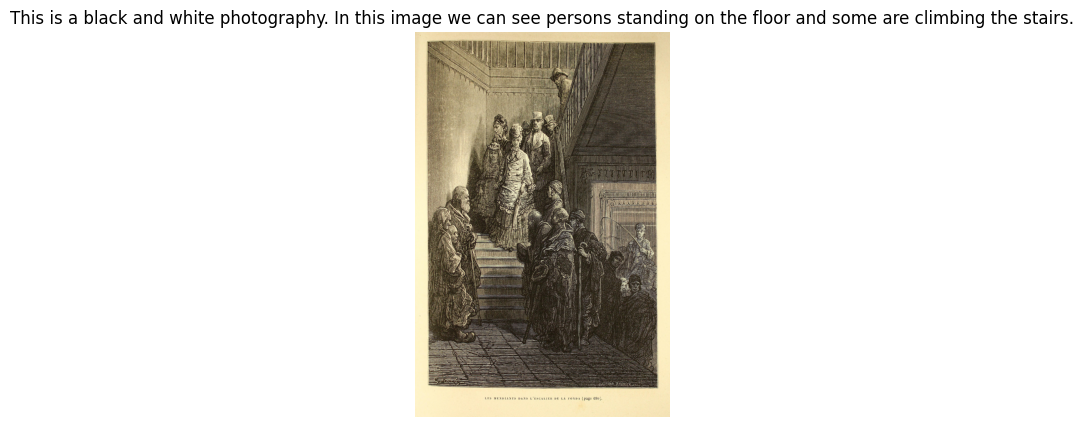

tensor[26] i64 x∈[2, 2899] μ=203.115 σ=612.855

[2, 14, 9, 5, 50, 7, 39, 2899, 6, 14, 17, 13, 11, 10, 54, 27, 12, 4, 172, 7, 20, 15, 1305, 4, 562, 3]

In [21]:
# Show sample image and caption
image, target, caption = trn_ds.choose()
show(image, title=caption, sz=5); print(target)
target_list = target.flatten().tolist()
print(target_list)


###Create the dataloaders for the datasets

In [22]:

trn_dl = DataLoader(trn_ds, 32, collate_fn=trn_ds.collate_fn)
val_dl = DataLoader(val_ds, 32, collate_fn=val_ds.collate_fn)

In [23]:
!pip install torch torchvision torchaudio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.8/209.8 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.2/89.2 MB 10.2 MB/s eta 0:00:00
  Attempting uninstall: triton
    Found existing installation: triton 2.2.0
    Uninstalling triton-2.2.0:
      Successfully uninstalled triton-2.2.0
  Attempting uninstall: nvidia-nccl-cu12
    Found existing installation: nvidia-nccl-cu12 2.19.3
    Uninstalling nvidia-nccl-cu12-2.19.3:
      Successfully uninstalled nvidia-nccl-cu12-2.19.3
  Attempting uninstall: torch
    Found existing installation: torch 2.2.1
    Uninstalling torch-2.2.1:
      Successfully uninstalled torch-2.2.1


In [24]:
!pip install torch_snippets

In [25]:
import torch
from torch_snippets import inspect

In [26]:
# A sample batch
import torch
inspect(*next(iter(trn_dl)), names='images,targets,lengths')

══════════════════════════════════════════════════════════════════

tensor[32, 3, 224, 224] n=4816896 (18Mb) x∈[-2.118, 2.640] μ=-0.076 σ=1.244 cuda:0

══════════════════════════════════════════════════════════════════

tensor[32, 83] i64 n=2656 (21Kb) x∈[0, 4754] μ=66.485 σ=316.249 cuda:0

══════════════════════════════════════════════════════════════════

tensor[32] i64 x∈[7, 83] μ=40.312 σ=16.193 cuda:0

══════════════════════════════════════════════════════════════════

In [27]:
from torch.nn.utils.rnn import pack_padded_sequence
from torchvision import models
# Define the network class:
#Define the encoder architecture – EncoderCNN:

class EncoderCNN(nn.Module):

    # Load the pretrained ResNet-152 and replace top fc layer
    def __init__(self, embed_size):
        super(EncoderCNN, self).__init__()
        resnet = models.resnet152(pretrained=True)

        # Felete the last fc layer.
        modules = list(resnet.children())[:-1]

        # Connect it to a linear layer
        self.resnet = nn.Sequential(*modules)
        self.linear = nn.Linear(resnet.fc.in_features, embed_size)

        # Pass it through batch normalization
        self.bn = nn.BatchNorm1d(embed_size, momentum=0.01)

    # Extract feature vectors from input images
    def forward(self, images):
        with torch.no_grad():
            features = self.resnet(images)

        features = features.reshape(features.size(0), -1)
        features = self.bn(self.linear(features))

        return features

In [28]:
# Fetch a summary of the encoder class:
from torchsummary import summary

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
encoder = EncoderCNN(256).to(device)
print(summary(encoder, (3, 224, 224), device=device.type))

Downloading: "https://download.pytorch.org/models/resnet152-394f9c45.pth" to /root/.cache/torch/hub/checkpoints/resnet152-394f9c45.pth
100%|██████████| 230M/230M [00:01<00:00, 156MB/s]


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

None

In [29]:
# Define the decoder architecture – DecoderRNN Class
class DecoderRNN(nn.Module):

    # Initialize the hyper-parameters and build the layers
    def __init__(self, embed_size, hidden_size, vocab_size, num_layers, max_seq_length=80):

        super(DecoderRNN, self).__init__()

        self.embed = nn.Embedding(vocab_size, embed_size)
        self.lstm = nn.LSTM(embed_size, hidden_size, num_layers, batch_first=True)
        self.linear = nn.Linear(hidden_size, vocab_size)
        self.max_seq_length = max_seq_length

    # Decode image feature vectors and generates captions
    def forward(self, features, captions, lengths):
        embeddings = self.embed(captions)
        embeddings = torch.cat((features.unsqueeze(1), embeddings), 1)

        packed = pack_padded_sequence(embeddings, lengths.cpu(), batch_first=True)

        outputs, _ = self.lstm(packed)
        outputs = self.linear(outputs[0])
        return outputs

    #Generate captions for given image features using greedy search
    def predict(self, features, states=None):
        sampled_ids = []
        inputs = features.unsqueeze(1)

        for i in range(self.max_seq_length):
            hiddens, states = self.lstm(inputs, states) # hiddens: (batch_size, 1, hidden_size)

            outputs = self.linear(hiddens.squeeze(1)) # outputs: (batch_size, vocab_size)
            _, predicted = outputs.max(1) # predicted: (batch_size)

            sampled_ids.append(predicted)

            inputs = self.embed(predicted) # inputs: (batch_size, embed_size)
            inputs = inputs.unsqueeze(1) # inputs: (batch_size, 1, embed_size)


        sampled_ids = torch.stack(sampled_ids, 1) # sampled_ids: (batch_size, max_seq_length)

        # convert predicted tokens to strings
        sentences = []
        for sampled_id in sampled_ids:
            sampled_id = sampled_id.cpu().numpy()
            sampled_caption = []

            for word_id in sampled_id:
                word = vocab.itos[word_id]
                sampled_caption.append(word)

                if word == '<end>':
                    break

            sentence = ' '.join(sampled_caption)
            sentences.append(sentence)

        return sentences

In [30]:
# Trains on a single batch of data
def train_batch(data, encoder, decoder, optimizer, criterion):
    encoder.train()
    decoder.train()

    images, captions, lengths = data
    images = images.to(device)

    captions = captions.to(device)
    targets = pack_padded_sequence(captions, lengths.cpu(), batch_first=True)[0]

    features = encoder(images)
    outputs = decoder(features, captions, lengths)
    loss = criterion(outputs, targets)

    decoder.zero_grad()
    encoder.zero_grad()
    loss.backward()
    optimizer.step()

    return loss

In [31]:
# Validation on a batch of data
@torch.no_grad()
def validate_batch(data, encoder, decoder, criterion):
    encoder.eval()
    decoder.eval()

    images, captions, lengths = data
    images = images.to(device)

    captions = captions.to(device)
    targets = pack_padded_sequence(captions, lengths.cpu(), batch_first=True)[0]

    features = encoder(images)
    outputs = decoder(features, captions, lengths)

    loss = criterion(outputs, targets)
    return loss

In [32]:
# Define encoder, decoder, loss function, and optimizer
encoder = EncoderCNN(256).to(device)
decoder = DecoderRNN(256, 512, len(vocab.itos), 1).to(device)
criterion = nn.CrossEntropyLoss()

params = list(decoder.parameters()) + \
         list(encoder.linear.parameters()) + \
         list(encoder.bn.parameters())

optimizer = torch.optim.AdamW(params, lr=1e-3)



In [33]:
n_epochs = 5
log = Report(n_epochs)

EPOCH: 1.000  val_loss: 2.628  trn_loss: 3.295  (344.93s - 1379.70s remaining)
EPOCH: 2.000  val_loss: 2.410  trn_loss: 2.481  (587.60s - 881.40s remaining)
EPOCH: 3.000  val_loss: 2.286  trn_loss: 2.247  (833.27s - 555.52s remaining)
EPOCH: 4.000  val_loss: 2.250  trn_loss: 2.085  (1075.44s - 268.86s remaining)
EPOCH: 5.000  val_loss: 2.244  trn_loss: 2.051  (1319.68s - 0.00s remaining)


100%|██████████| 106/106 [00:00<00:00, 3107.74it/s]


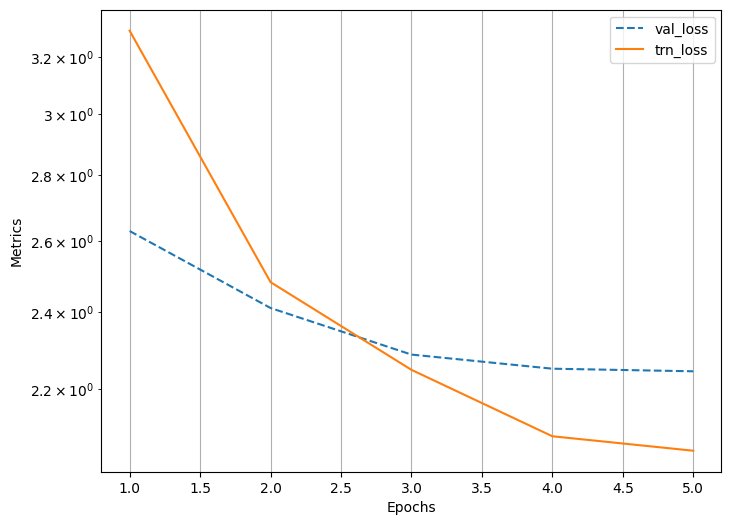

In [34]:
# Train the model over increasing epochs
for epoch in range(n_epochs):
    if epoch == 3: optimizer = torch.optim.AdamW(params, lr=1e-4)

    N = len(trn_dl)
    for i, data in enumerate(trn_dl):
        trn_loss = train_batch(data, encoder, decoder, optimizer, criterion)
        pos = epoch + (1+i)/N
        log.record(pos=pos, trn_loss=trn_loss, end='\r')

    N = len(val_dl)

    for i, data in enumerate(val_dl):
        val_loss = validate_batch(data, encoder, decoder, criterion)
        pos = epoch + (1+i)/N
        log.record(pos=pos, val_loss=val_loss, end='\r')

    log.report_avgs(epoch+1)

log.plot_epochs(log=True)

In [35]:
# Generates predictions given an image
def load_image(image_path, transform=None):
    image = Image.open(image_path).convert('RGB')
    image = image.resize([224, 224], Image.LANCZOS)

    if transform is not None:
        tfm_image = transform(image)[None]

    return image, tfm_image

def load_image_and_predict(image_path):
    transform = transforms.Compose([transforms.ToTensor(),
                                    transforms.Normalize((0.485, 0.456, 0.406),(0.229, 0.224, 0.225))
                                    ])

    org_image, tfm_image = load_image(image_path, transform)
    image_tensor = tfm_image.to(device)

    encoder.eval()
    decoder.eval()

    feature = encoder(image_tensor)
    sentence = decoder.predict(feature)[0]
    show(org_image, title=sentence)
    return sentence

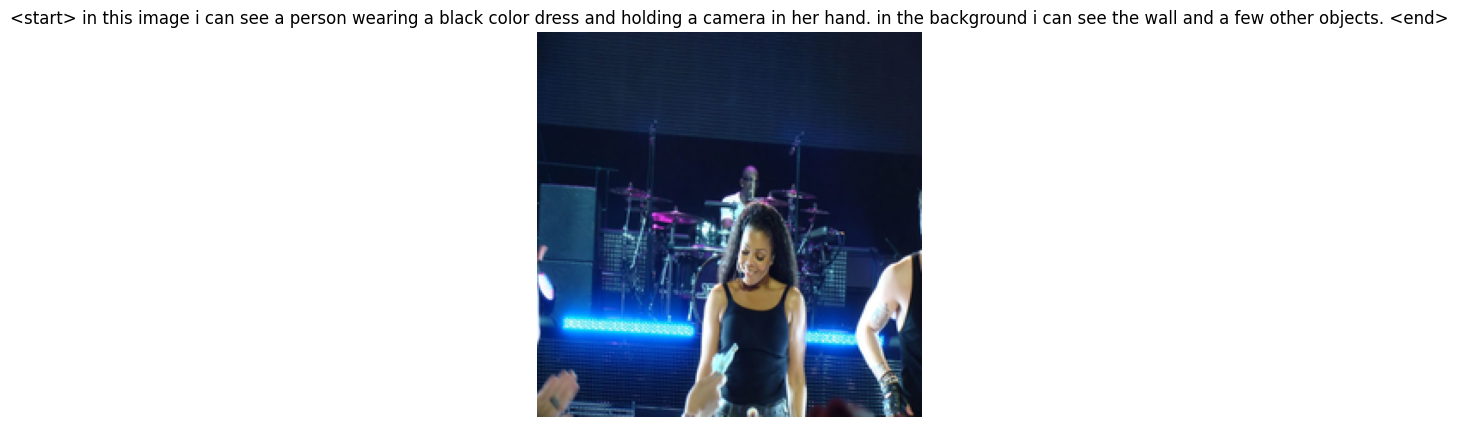

'<start> in this image i can see a person wearing a black color dress and holding a camera in her hand. in the background i can see the wall and a few other objects. <end>'

In [36]:
# Predict an image
files = Glob('val-images')
load_image_and_predict(choose(files))